<a href="https://colab.research.google.com/github/ArifDwiSyafutra/2801FW1_2098KEL4/blob/master/analisis_sentimen_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Natural language Processing

# 1. Basic Text Processing


## 1.1   Pemilihan Corpus



In [ ]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 1.2 Pemilihan Dataset


In [ ]:
df = pd.read_csv('/content/Twitter_Emotion_Dataset.csv', nrows=2000)

# 2. Preprocessing Data

## 2.1 Puctuation

menghapus URL, angka, mengubah teks menjadi lowercase, menghapus kata 'username', dan mengganti tanda baca dengan spasi.


In [ ]:
def clean_text(text):
    # menghapus URL
    text = re.sub(r'http\S+', '', text)
    
    # menghapus angka
    text = re.sub('\d+', '', text)
    
    # mengubah teks menjadi lowercase
    text = text.lower()
    
    # menghapus kata 'username'
    text = re.sub('username', '', text)
    
    # mempertahankan beberapa tanda baca tertentu
    text = re.sub('[‘’“”"\'`]', '', text)
    
    # mengganti tanda baca lainnya dengan spasi
    text = re.sub('[^\w\s]', ' ', text)
    
    return text

df['tweet'] = df['tweet'].apply(lambda x: clean_text(x))

## 2.2 Tokenisasi

In [ ]:
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

df['tweet'] = df['tweet'].apply(lambda x: tokenize_text(x))

## 2.3 Stopword

In [ ]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('indonesian'))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df['tweet'] = df['tweet'].apply(lambda x: remove_stopwords(x))


## 2.4 Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    stemmed_text = [stemmer.stem(word) for word in text]
    return stemmed_text

df['tweet'] = df['tweet'].apply(lambda x: stem_text(x))


## 2.5 Lemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_text

df['tweet'] = df['tweet'].apply(lambda x: lemmatize_text(x))

## 2.6 Normalisasi

In [ ]:
def join_text(text):
    joined_text = ' '.join(text)
    return joined_text

df['tweet'] = df['tweet'].apply(lambda x: join_text(x))

## 2.7 Clean Dataset

In [ ]:
df.to_csv('preprocessed_dataset.csv', index=False)
df.head()

,label,tweet
0,anger,jln jatibarupolisi tdk bs gertak gubernur eman...
1,anger,cewe lho kayak rasain sibuk jaga rasain sakit ...
2,happy,kepingin gudeg mbarek bu hj amad foto google s...
3,anger,jln jatibarubagian wilayah tn abangpengaturan ...
4,happy,sharing alam aja kemarin jam batalin tiket sta...


# 3. TD IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# mendefinisikan objek vectorizer 
vectorizer = TfidfVectorizer()

# # Menghitung nilai TF-IDF dari Kolom Tweet
vectorizer.fit(df['tweet'])

# Mengubah Nilai dari tiap kata kolom Tweet menjadi Matriks TF-IDF
tfidf_matrix = vectorizer.transform(df['tweet'])

# Melihat 10 deret pertama 
print("First 10 feature names:", vectorizer.get_feature_names_out()[:10])

# Cetak Matriks TF-IDF
print("All rows of the TF-IDF matrix:")
print(tfidf_matrix.toarray())

TF-IDF matrix shape: (2000, 9113)
First 10 feature names: ['aa' 'aaa' 'aaaaaaa' 'aaaaak' 'aaah' 'aaahhhh' 'aaamiiinnn' 'aalamiin'
 'aamiiin' 'aamiin']
First row of the TF-IDF matrix:
 [[0. 0. 0. ... 0. 0. 0.]]


# 4. Visualization

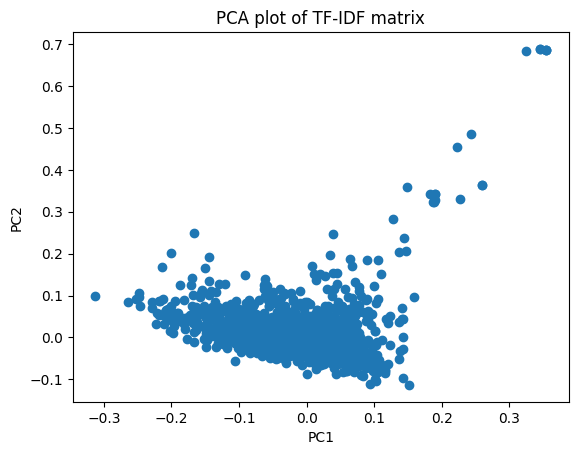

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduksi dimensi menjadi dimensi yang diinginkan
pca = PCA(n_components=2)
tfidf_matrix_pca = pca.fit_transform(tfidf_matrix.toarray())

# Membuat scatter plot menggunakan nilai dari komponen pertama (PC1) dan komponen kedua (PC2) yang didapatkan dari PCA.
plt.scatter(tfidf_matrix_pca[:, 0], tfidf_matrix_pca[:, 1])

# Label x dan Label y
plt.title('PCA plot of TF-IDF matrix')
plt.xlabel('PC1')
plt.ylabel('PC2')

#Menampilkan Plot
plt.show()

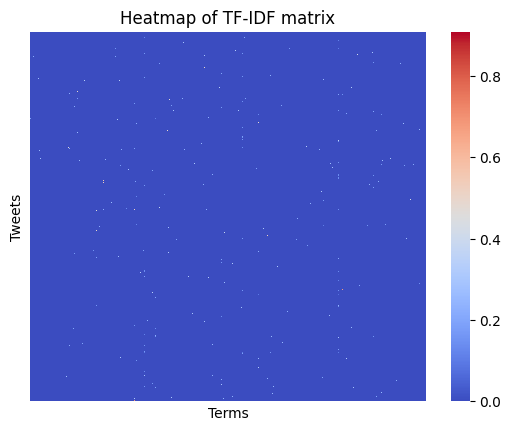

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat DataFrame dari TF-IDF matrix dan mengambil 1000 baris pertama
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.iloc[:1000]

# Membuat heatmap dari 1000 baris pertama dengan menggunakan library seaborn
sns.heatmap(tfidf_df, cmap='coolwarm', xticklabels=False, yticklabels=False, annot=False)

# Menambahkan judul pada plot
plt.title('Heatmap of TF-IDF matrix')

# Memberikan label pada sumbu x dan y
plt.xlabel('Terms')
plt.ylabel('Tweets')

# Menampilkan plot
plt.show()

# 5. Kmeans Algorithm

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

# Read the preprocessed data
df = pd.read_csv('preprocessed_dataset.csv')

# Menginisialisasi objek KMeans dengan 5 cluster
kmeans = KMeans(n_clusters=5)

# Menggunakan metode KMeans untuk mengubah matriks TF-IDF dan memperoleh nilai cluster
clusters = kmeans.fit_transform(tfidf_matrix)

# Melatih model KMeans pada matriks TF-IDF
kmeans.fit(tfidf_matrix)

# Menambahkan label cluster ke DataFrame
df['Cluster'] = kmeans.labels_

# Print centroid dari masing-masing cluster.
print("Centroids:")
for i, centroid in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i}: {centroid}")

# Mencetak jumlah tweet dalam setiap kluster.
print(df['Cluster'].value_counts())

# Mencetak tabel klaster tiap data
print(df.groupby('Cluster').size())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids:
Cluster 0: [0. 0. 0. ... 0. 0. 0.]
Cluster 1: [0.         0.         0.         ... 0.00274094 0.0022873  0.        ]
Cluster 2: [0.         0.         0.         ... 0.         0.         0.00058907]
Cluster 3: [0.         0.00043081 0.         ... 0.00061236 0.00119555 0.        ]
Cluster 4: [0.00109193 0.         0.00029901 ... 0.         0.         0.        ]
4    994
3    489
2    333
1    114
0     70
Name: Cluster, dtype: int64
Inertia: 1960.7467515919388


# 6. Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['label'], test_size=0.2, random_state=42)

# Menampilkan jumlah data pada data latih dan data uji.
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(X_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(X_test))


vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Inisialisasi Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# Melatih model Random Forest pada data latih.
rf.fit(X_train_tfidf, y_train)

# Memprediksi label pada data uji.
y_pred = rf.predict(X_test_tfidf)

# Evaluasi performa model dengan menggunakan accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Menampilkan classification report 
report = classification_report(y_test, y_pred)
print("Classification report:\n", report)